# Tutorial on how to use the [pyPhenoPop](https://github.uio.no/leonargs/pyPhenoPop) package for phenotypic deconvolution in heterogeneous cancer cell populations using drug screening data

For details on the method, we refer to the original [publication](https://www.biorxiv.org/content/10.1101/2022.01.17.476604v2).

The main function of the package is the `mixture_id` function which can be imported via `from pyphenopop.mixpopid import mixture_id`

In [1]:
from pyphenopop.mixpopid import mixture_id

`mixture_id` has 5 required and 6 optional arguments (see `help(mixture_id)` for details). The data needs to be provided as `csv` file, where the rows are the cell counts for different concentrations of the drug and the columns are timepoints and replicates. The format is structured as follows:

|  | |
|------------------------|------------------------|
| replicate1_time1_dose1 | replicate1_time1_dose2 |
| replicate2_time1_dose1 | replicate2_time1_dose2 |
| replicate1_time2_dose1 | replicate1_time2_dose2 |
| replicate2_time2_dose1 | replicate2_time2_dose2 |

Here we use simulated data from [Köhn-Luque et al.](https://www.biorxiv.org/content/10.1101/2022.01.17.476604v2), corresponding to the data used in Figure 2a, 4th row. The data can be found in the `example` folder as `DATA-2-case-1-Noise-50-mix-0.5.csv`.

We can start by plotting the data before applying the PhenoPop method to it.

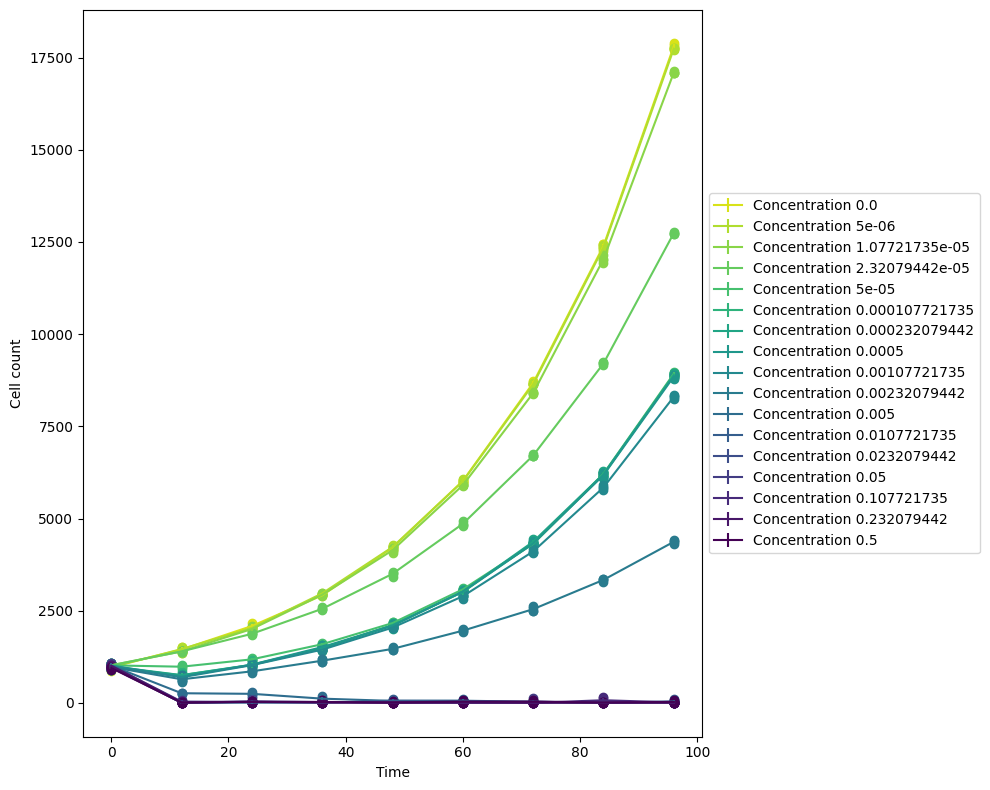

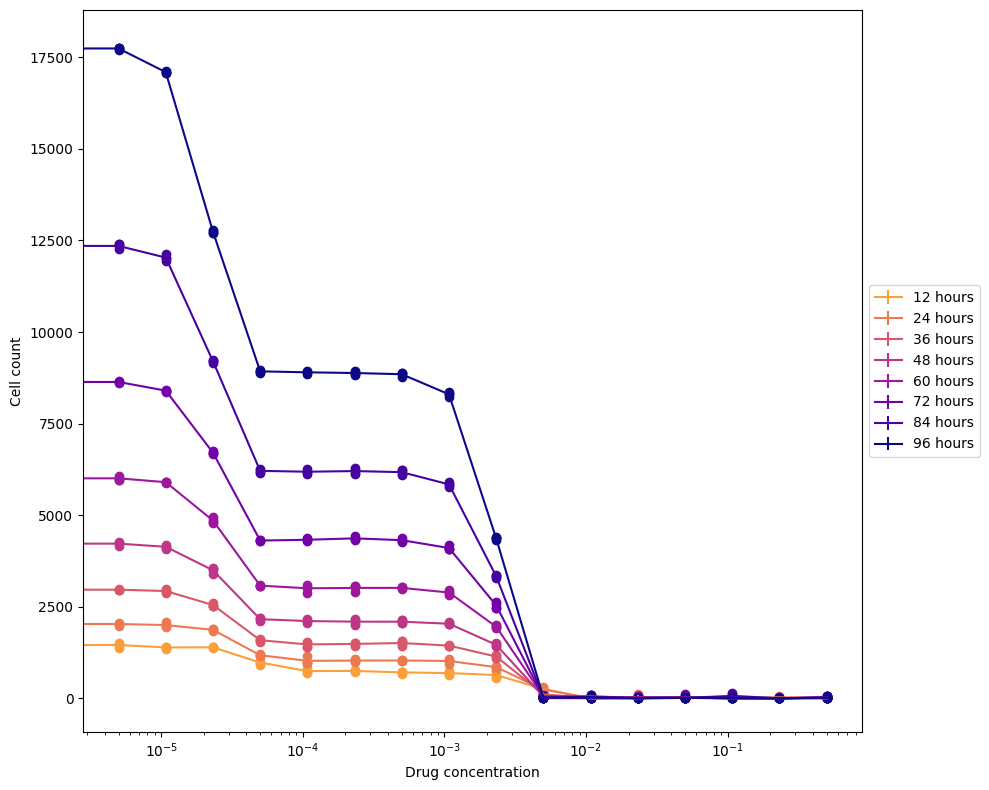

In [2]:
from pyphenopop.plotting import *

# Specify data
example_file = './DATA-2-case-1-Noise-50-mix-0.5.csv'

num_replicates = 4

timepoints = [0, 12, 24, 36, 48, 60, 72, 84, 96]

concentrations = [0.00000000e+00, 5.00000000e-06, 1.07721735e-05, 2.32079442e-05,
       5.00000000e-05, 1.07721735e-04, 2.32079442e-04, 5.00000000e-04,
       1.07721735e-03, 2.32079442e-03, 5.00000000e-03, 1.07721735e-02,
       2.32079442e-02, 5.00000000e-02, 1.07721735e-01, 2.32079442e-01,
       5.00000000e-01]

plot_in_time(example_file, num_replicates, timepoints, concentrations);
plot_in_conc(example_file, num_replicates, timepoints, concentrations);

Next, we apply the PhenoPop method with maximal 4 subpopulations and 200 local optimization runs per subpopulation. Here we use 'BIC' as model selection criteria.

In [3]:
max_subpopulations = 4
num_local_optimizations = 200
parameter_bounds = {'alpha': (0.0, 0.1), 'b': (1e-6, 1.0), 'E': (1e-06, 15), 'n': (0.01, 10)}
model_selection_method = 'BIC'
result = mixture_id(max_subpopulations,
                    example_file, 
                    timepoints, 
                    concentrations, 
                    num_replicates, 
                    num_optim=num_local_optimizations,
                    bounds_model=parameter_bounds,
                    selection_method=model_selection_method)

Optimizing for 1 subpopulation(s)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:31<00:00,  6.37it/s]


Optimizing for 2 subpopulation(s)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:56<00:00,  1.71it/s]


Optimizing for 3 subpopulation(s)


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 195/200 [04:11<00:05,  1.12s/it]

optimization failed for 3 subpopulations and start 194, with initial parameters [3.55421127e-01 3.78435751e-01 7.00400295e-02 5.76685071e-01
 4.28409986e+00 3.27889590e+00 5.77112696e-02 4.97699121e-01
 5.49723161e+00 3.92214226e+00 9.99322216e-03 4.28222655e-01
 5.20037893e+00 4.22712521e-01 9.02212399e+03 3.77545708e+03].Error message: `x0` violates bound constraints.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [04:19<00:00,  1.30s/it]


Optimizing for 4 subpopulation(s)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:50<00:00,  2.35s/it]

Estimated number of cell populations based on BIC: 2
Minimal negative log-likelihood value found: 3507.8429937626715
Mixture parameter(s):  [0.4994352934282781, 0.5005647065717219]
Model parameters for subpopulation 1:
Estimated GR50: 0.0006200887102030974
alpha :  0.030535166312257524
b :  0.00026047288573482406
E :  0.00012982145764637554
n :  2.6389325048492696
Model parameters for subpopulation 2:
Estimated GR50: 0.012828527844994725
alpha :  0.030004109642056943
b :  0.30417021868156574
E :  0.01053838401340258
n :  3.0259792013008964
Sigma high: 323.8694439190568
Sigma low: 68.88321954153422


The result dictionary contains a summary of the optimization results and more detailed results for the different subpopulations. `fval` and `parameters` are the negative log-likelihood value and the parameters for all local optimizations. `final_fval` and `final_parameters` are the respective results of the overall best run.

In [4]:
print('Keys of the result dict:\n', result.keys())
print('Keys per subpopulation:\n', result['2_subpopulations'].keys())
print('Summary:\n', result['summary'])


Keys of the result dict:
 dict_keys(['1_subpopulations', '2_subpopulations', '3_subpopulations', '4_subpopulations', 'summary'])
Keys per subpopulation:
 dict_keys(['fval', 'parameters', 'BIC', 'AIC', 'final_fval', 'final_parameters', 'gr50'])
Summary:
 {'estimated_num_populations': 2, 'final_neg_log_likelihood': 3507.8429937626715, 'best_optimization_idx': 184, 'final_parameters': array([4.99435293e-01, 3.05351663e-02, 2.60472886e-04, 1.29821458e-04,
       2.63893250e+00, 3.00041096e-02, 3.04170219e-01, 1.05383840e-02,
       3.02597920e+00, 3.23869444e+02, 6.88832195e+01])}


After performing parameter optimization, the results can be plotted in different ways.

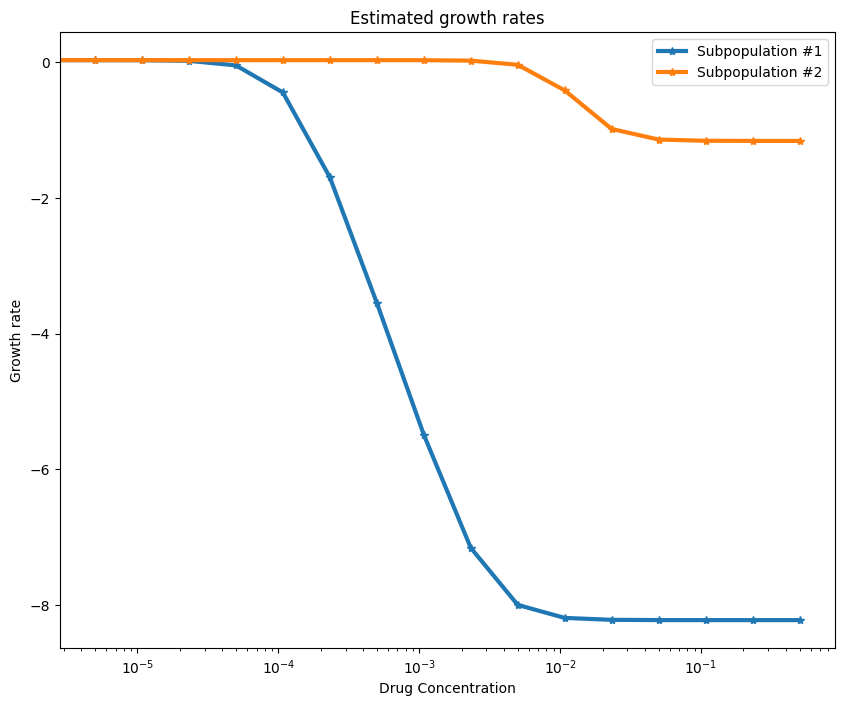

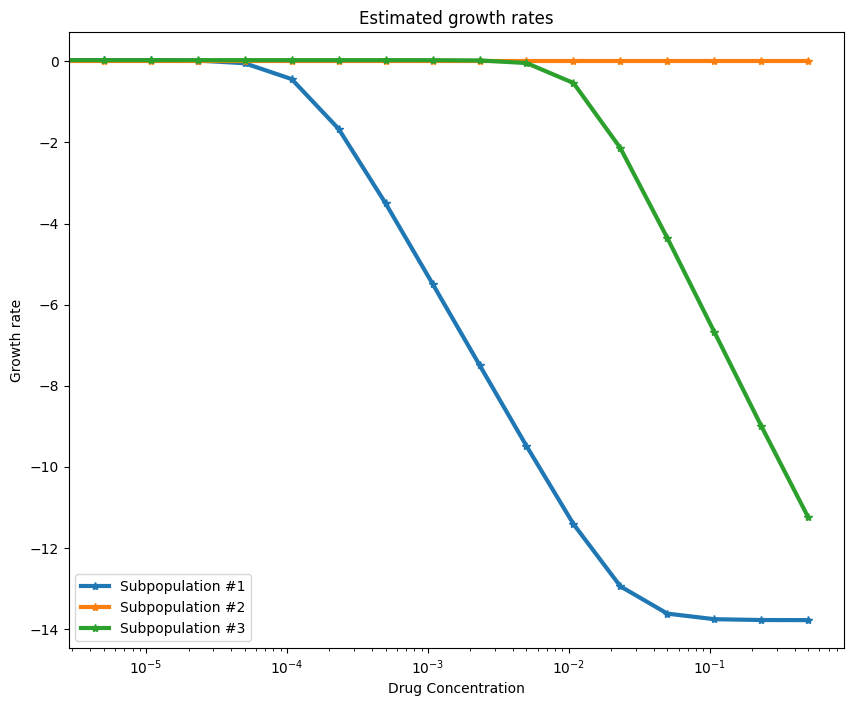

In [5]:
# Plot growth rate curves for the best subpopulation model
plot_growth_curves(result, concentrations);

# We can also plot growth rates for the other models
subpopulation_idx = 3
plot_growth_curves(result, concentrations, subpopulation_idx);


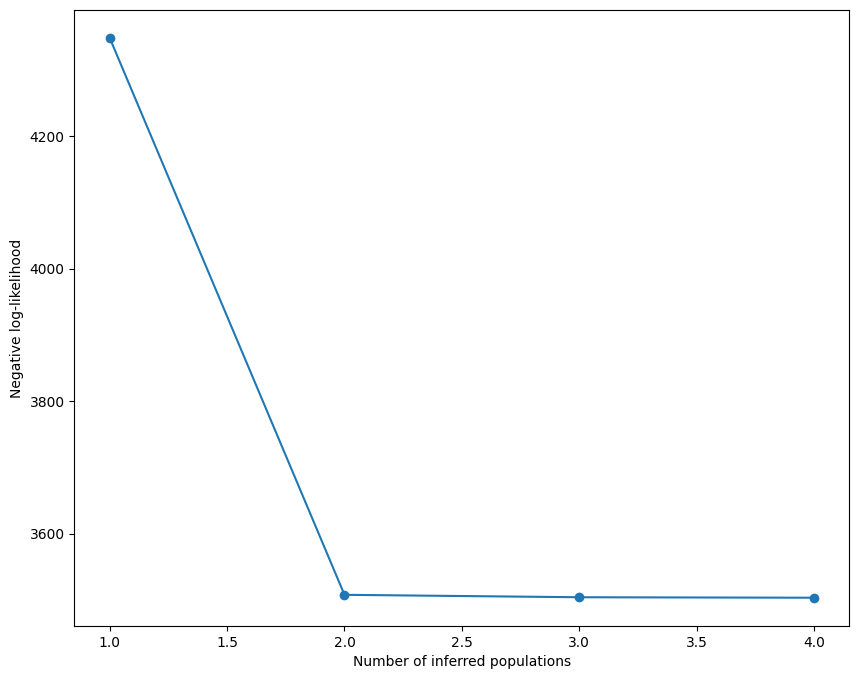

In [6]:
# Plot negative log-likelihood values for the different models
plot_neg_llh(result);

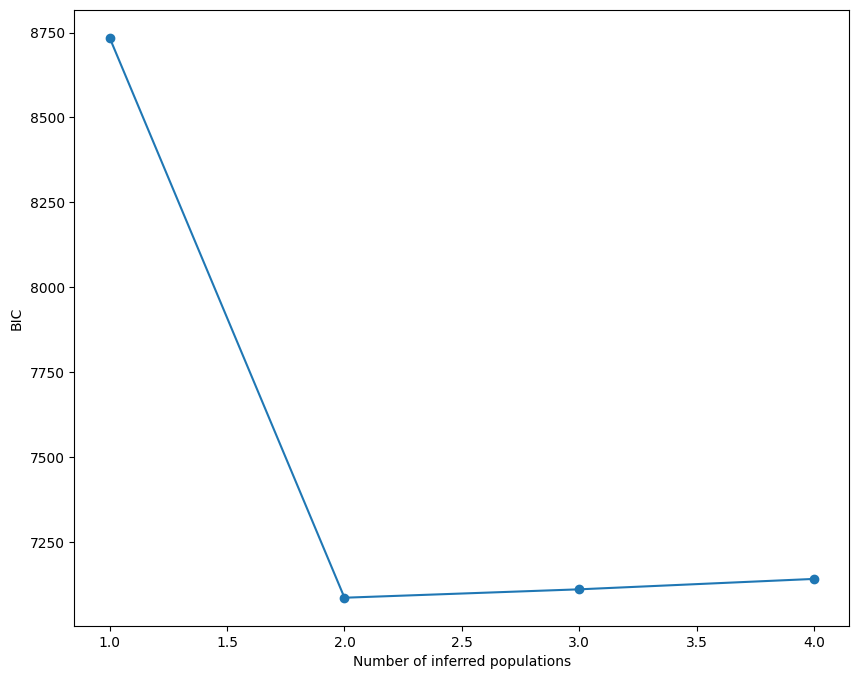

In [7]:
# Plot BIC values for the different models
plot_bic(result);

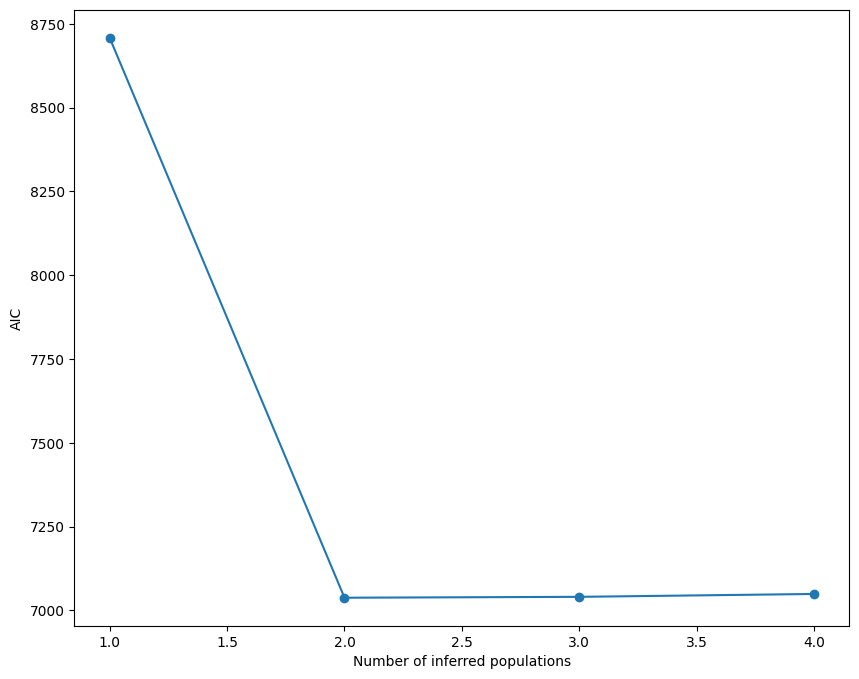

In [8]:
# Plot AIC values for the different models
plot_aic(result);